In [1]:
import numpy as np
from sklearn.datasets import make_classification

from utils import plot_decision_boundary, plot_data

seed = 30

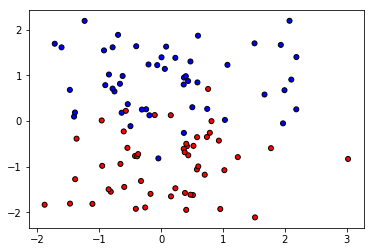

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=seed)

plot_data(X, y, s=25)

In [3]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def grad_sigmoid(Z):
    s = sigmoid(Z)
    return s * (1 - s)

def mse(y, y_pred):
    m = y.shape[0]
    return (1 / m) * (y - y_pred) ** 2

def grad_mse(y, y_pred):
    return y_pred - y

In [4]:
class Perceptron:
    
    def __init__(self, lr=0.01, n_iter=1000):
        
        self.lr = lr
        self.n_iter = n_iter
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        _, n_output = y.shape
        self.W = np.random.randn(n_features, n_output)
        self.b = np.zeros((1, n_output))
        
        for _ in range(self.n_iter):
            output = X.dot(self.W) + self.b
            pred = sigmoid(output)
            loss = mse(y, pred)
            grad = grad_mse(y, output) * grad_sigmoid(output)
            grad_W = X.T.dot(grad)
            grad_b = np.sum(grad)
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b
    
    def predict(self, X):
        return np.argmax(sigmoid(X.dot(self.W) + self.b), axis=1)

In [5]:
one_hot_y = np.eye(2)[y]

perceptron = Perceptron()
perceptron.fit(X, one_hot_y)
preds = perceptron.predict(X)

print("Accuracy: ", (preds == y).mean())

Accuracy:  0.9


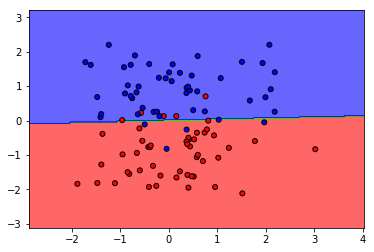

In [6]:
plot_decision_boundary(perceptron, X, y)
plot_data(X, y, s=25)

In [7]:
# Sklearn way
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X, y)
preds = perceptron.predict(X)

print("Accuracy: ", (preds == y).mean())

Accuracy:  0.9


/home/alperen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


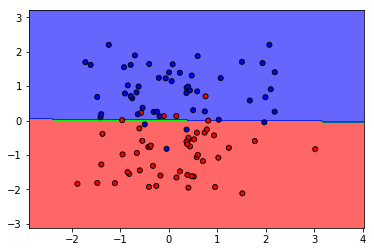

In [8]:
plot_decision_boundary(perceptron, X, y)
plot_data(X, y, s=25)